<a href="https://colab.research.google.com/github/ZahraDehghani99/AI-Internship/blob/master/HW5/text_classification_with_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Work5 - Document Categorization using Transformers

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read data and Data preprocessing

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/NLP/HW4/persica_final_edit.csv')
# df.columns = ['text', 'label']
# df.to_csv('/content/drive/MyDrive/NLP/HW5/persica_hw5.csv', index=False)

In [45]:
df = pd.read_csv('/content/drive/MyDrive/NLP/HW5/persica_hw5.csv')

In [4]:
df.head()

,text,label
0,وزير علوم در جمع استادان نمونه كشور گفت: از اس...,آموزشي
1,به گزارش سرويس صنفي آموزشي خبرگزاري دانشجويان ...,آموزشي
2,نتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و ك...,آموزشي
3,محمدتقي علوي يزدي، مجري اين طرح پژوهشي در اين‌...,آموزشي
4,دوره آموزشي سيره نبوي بعنوان يكي از رشته‌هاي ج...,آموزشي


In [5]:
print(f'df shape : {df.shape}')

df shape : (10988, 2)


In [6]:
df.label.value_counts()

آموزشي        1000
اقتصادي       1000
بهداشتي       1000
مذهبي         1000
اجتماعي        999
فرهنگي         999
ورزشي          999
تاريخي         998
سياسي          998
فقه و حقوق     998
علمي           997
Name: label, dtype: int64

Let's see the data distribution in each class.

In [4]:
!pip install -q python-bidi
!pip install -q arabic-reshaper

In [5]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

classes = [get_display(reshape(label)) for label in df.label]
y_fa = pd.DataFrame(classes)
y_fa.columns = ['label']

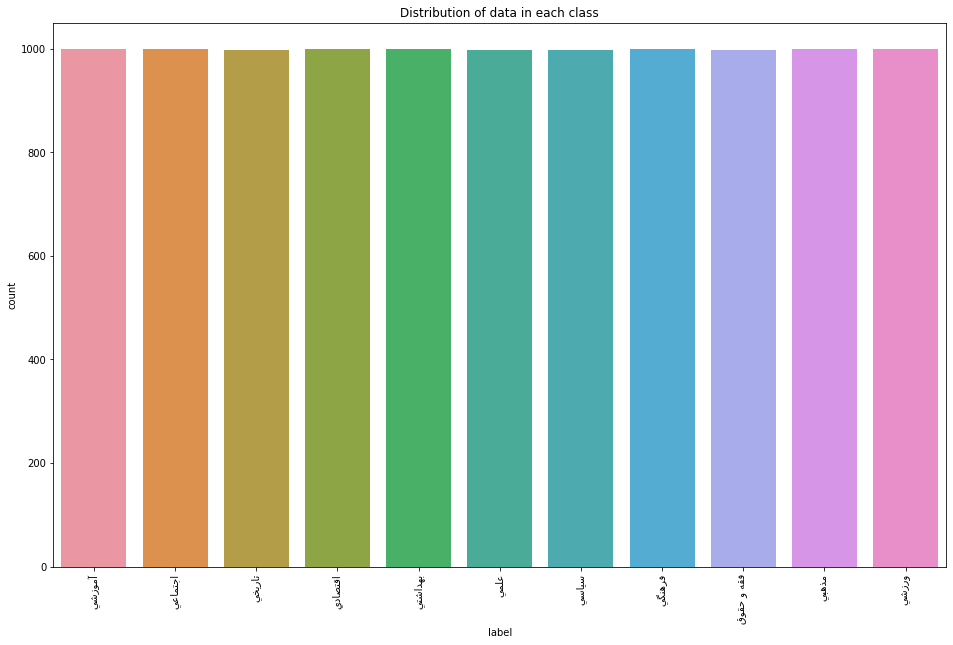

In [10]:
fig = plt.figure(figsize=(16,10))
sns.countplot(x="label", data=y_fa)
plt.title("Distribution of data in each class")
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=15)
plt.show()

Let's see length of the news in each class.

In [46]:
df["Word per New"] = df["text"].str.split().apply(len)

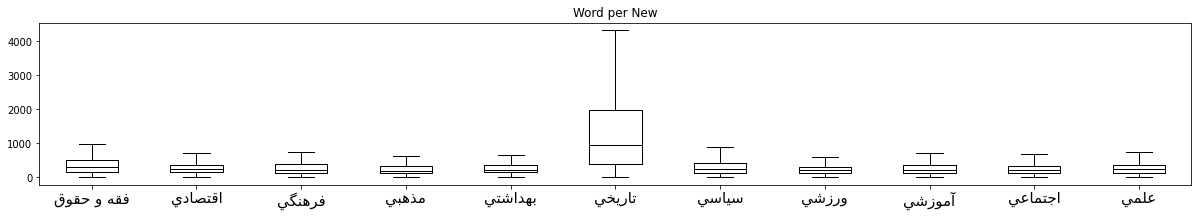

In [24]:
df.boxplot("Word per New", by=y_fa["label"] , grid=False, showfliers=False,
           color="black")

plt.rcParams["figure.figsize"] = (20,3)
plt.suptitle("")
plt.xlabel("")
plt.show()

In [21]:
df.head()

,text,label,Word per New
0,وزير علوم در جمع استادان نمونه كشور گفت: از اس...,آموزشي,365
1,به گزارش سرويس صنفي آموزشي خبرگزاري دانشجويان ...,آموزشي,106
2,نتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و ك...,آموزشي,114
3,محمدتقي علوي يزدي، مجري اين طرح پژوهشي در اين‌...,آموزشي,351
4,دوره آموزشي سيره نبوي بعنوان يكي از رشته‌هاي ج...,آموزشي,215


In [9]:
max(df["Word per New"])

6332

## Split X and y

In [47]:
X = df.drop(columns=['Word per New', 'label'])
y = pd.DataFrame(df['label'])

print(f'X shape : {X.shape}')
print(f'y shape : {y.shape}')

X shape : (10988, 1)
y shape : (10988, 1)


In [28]:
X.head()

,text
0,وزير علوم در جمع استادان نمونه كشور گفت: از اس...
1,به گزارش سرويس صنفي آموزشي خبرگزاري دانشجويان ...
2,نتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و ك...
3,محمدتقي علوي يزدي، مجري اين طرح پژوهشي در اين‌...
4,دوره آموزشي سيره نبوي بعنوان يكي از رشته‌هاي ج...


## Train test split

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify= y_train, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'X_valid shape: {X_valid.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'y_valid shape: {y_valid.shape}')

X_train shape: (7911, 1)
X_test shape: (2198, 1)
X_valid shape: (879, 1)
y_train shape: (7911, 1)
y_test shape: (2198, 1)
y_valid shape: (879, 1)


## Label Encoder

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_valid = le.transform(y_valid)

In [13]:
y_train

array([8, 5, 3, ..., 4, 8, 1])

In [50]:
inv =  le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
classes = []
for i in range(len(inv)):
  classes.append(inv[i])
  print(f'{inv[i]} => {i}')

آموزشي => 0
اجتماعي => 1
اقتصادي => 2
بهداشتي => 3
تاريخي => 4
سياسي => 5
علمي => 6
فرهنگي => 7
فقه و حقوق => 8
مذهبي => 9
ورزشي => 10


In [49]:
classes = ["آموزشي", "اجتماعي", "اقتصادي", "بهداشتي", "تاريخي", "سياسي", "علمي", "فرهنگي", "فقه و حقوق", "مذهبي", "ورزشي"]

In [51]:
classes[1]

'اجتماعي'

## Append y to x for train set and test set

In [14]:
X_train['label'] = y_train.tolist()
X_valid['label'] = y_valid.tolist()
X_test['label'] = y_test.tolist()

In [15]:
# X_train.to_csv('/content/drive/MyDrive/NLP/HW5/train.csv', index=False)
# X_valid.to_csv('/content/drive/MyDrive/NLP/HW5/valid.csv', index=False)
# X_test.to_csv('/content/drive/MyDrive/NLP/HW5/test.csv', index=False)

In [16]:
train = pd.read_csv('/content/drive/MyDrive/NLP/HW5/train.csv')
train.head()

,text,label
0,به گزارش خبرنگار حقوقي خبرگزاري دانشجويان ايرا...,8
1,به گزارش خبرگزاري دانشجويان ايران (ايسنا)‏، اي...,5
2,محمد شريفي‌مقدم در گفت‌وگو با خبرنگار «بهداشت ...,3
3,به گزارش خبرنگار ايسنا، ذبيح‌اله قائمي كه به ه...,9
4,مهندس بشير دائمي در گفت‌وگو با خبرنگار سرويس آ...,0


In [17]:
print(f'train shape : {train.shape}')

train shape : (7911, 2)


In [20]:
valid = pd.read_csv('/content/drive/MyDrive/NLP/HW5/valid.csv')
valid.head()

,text,label
0,“محمد رفيع صادقي“ در گفت‌وگو با خبرنگار سرويس ...,6
1,به گزارش خبرگزاري دانشجويان ايران (ايسنا)، مها...,10
2,عبدالصمد خرمشاهي در گفت‌وگو با خبرنگار حقوقي خ...,8
3,به گزارش خبرنگار حقوقي خبرگزاري دانشجويان ايرا...,8
4,به گزارش خبرنگار اقتصادي خبرگزاري دانشجويان اي...,2


In [21]:
print(f'valid shape : {valid.shape}')

valid shape : (879, 2)


In [18]:
test = pd.read_csv('/content/drive/MyDrive/NLP/HW5/test.csv')
test.head()

,text,label
0,به گزارش خبرنگار سرويس ارتباطات خبرگزاري دانشج...,6
1,به گزارش ايسنا،در اين مراسم كه به رياست آقامحم...,10
2,به گزارش گروه دريافت ايسنا، حميد توكلي طاهباز،...,2
3,به گزارش خبرنگار خبرگزاري دانشجويان ايران (ايس...,7
4,به گزارش خبرگزاري دانشجويان ايران (ايسنا)، تيم...,10


In [19]:
print(f'test shape : {test.shape}')

test shape : (2198, 2)


## Transformers

In [6]:
!pip install -q transformers datasets

In [7]:
from datasets import load_dataset

PATH = "/content/drive/MyDrive/NLP/HW5/"
dataset = load_dataset("csv", data_files={"train": PATH + "train.csv", "validation": PATH + "valid.csv", "test": PATH + "test.csv"})

Using custom data configuration default-9d162db915dcc6fc
Reusing dataset csv (/root/.cache/huggingface/datasets/csv/default-9d162db915dcc6fc/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a)


  0%|          | 0/3 [00:00<?, ?it/s]

In [14]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 7911
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 879
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2198
    })
})

In [25]:
dataset['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 7911
})

In [26]:
dataset['train'].features

{'label': Value(dtype='int64', id=None),
 'text': Value(dtype='string', id=None)}

In [27]:
dataset['train'][0]

{'label': 8,
 'text': 'به گزارش خبرنگار حقوقي خبرگزاري دانشجويان ايران(ايسنا)، قوه\u200cي قضاييه جمهوري اسلامي ايران به مناسبت بيست و \u200cسومين جشنواره\u200cي فيلم فجر، به فيلم\u200cهاي شركت كننده در اين جشنواره كه داراي مضمون حقوقي قضايي و حقوق شهروندي باشند جايزه مي\u200cدهد. بر اساس اين گزارش 5 نفر از قضات و مديران دستگاه قضايي، داوري جنبي اين بخش را برعهده دارند.'}

## Tokenizing the whole dataset

In [8]:
from transformers import AutoTokenizer

model_ckpt = "HooshvareLab/bert-base-parsbert-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [59]:
tokenizer

PreTrainedTokenizerFast(name_or_path='HooshvareLab/bert-base-parsbert-uncased', vocab_size=100000, model_max_len=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [60]:
tokenizer.vocab_size

100000

In [61]:
tokenizer.model_max_length

1000000000000000019884624838656

In [62]:
tokenizer.model_input_names

['input_ids', 'token_type_ids', 'attention_mask']

اینجا رو تغییر دادم. در سایز ورودی فکر کنم مشکل داره.

In [9]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True, max_length=512)

In [11]:
print(tokenize(dataset["train"][0]))

{'input_ids': [2, 2031, 2248, 3699, 3147, 1216, 61826, 1216, 5360, 42906, 7764, 2616, 9, 7764, 39929, 10, 300, 4392, 1216, 4574, 1216, 7880, 3277, 1216, 2393, 1216, 7764, 2616, 2031, 5924, 58465, 2030, 331, 3310, 10308, 3617, 1216, 75227, 3204, 6056, 300, 2031, 75227, 40066, 2601, 1, 1, 2028, 7764, 1159, 3617, 1, 8499, 1216, 12983, 3147, 1216, 4574, 1216, 1216, 331, 3147, 7624, 1216, 2918, 85603, 1177, 328, 64981, 11468, 15, 2043, 2677, 7764, 1159, 2248, 1, 2603, 2036, 10585, 331, 2135, 25401, 2025, 2819, 4574, 1216, 1216, 300, 6011, 1216, 5996, 1216, 7764, 1159, 2345, 2049, 6496, 2522, 15, 4], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

Loading cached processed dataset at /root/.cache/huggingface/datasets/csv/default-9d162db915dcc6fc/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a/cache-d2fb0c31f06b4542.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/csv/default-9d162db915dcc6fc/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a/cache-dd8e80c0bf350e63.arrow


In [13]:
print(dataset_encoded["train"].column_names)

['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask']


## Fine-Tunning Transformers

In [11]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
device

device(type='cuda')

In [13]:
!nvidia-smi

Thu Aug  4 10:30:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    11W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

You will see a warning that some parts of the model are randomly initialized.
This is normal since the classification head has not yet been trained. The n

In [14]:
from transformers import AutoModelForSequenceClassification

num_labels = 11
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassifica

In [17]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [19]:
model.bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(100000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [18]:
model.classifier

Linear(in_features=768, out_features=11, bias=True)

## Defining the performance metrics

In [15]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids #
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

## Training the model

In [16]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"/content/drive/MyDrive/NLP/HW5/{model_ckpt}-finetuned-persika"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

In [17]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["validation"],
                  tokenizer=tokenizer)

In [19]:
import torch
torch.cuda.empty_cache()

In [20]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  636652 KB |  636652 KB |  636652 KB |       0 B  |\n|       from large pool |  636128 KB |  636128 KB |  636128 KB |       0 B  |\n|       from small pool |     524 KB |     524 KB |     524 KB |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |  636652 KB |  636652 KB |  636652 KB |       0 B  |\n|       from large pool |  636128 KB |  636128 KB |

In [21]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.719700,0.399790,0.891923,0.891551
2,0.308400,0.410378,0.904437,0.904154


TrainOutput(global_step=1978, training_loss=0.5143432483393454, metrics={'train_runtime': 1695.6964, 'train_samples_per_second': 9.331, 'train_steps_per_second': 1.166, 'total_flos': 4163279514384384.0, 'train_loss': 0.5143432483393454, 'epoch': 2.0})

## Evaluation

In [22]:
preds_output = trainer.predict(dataset_encoded["validation"])

In [28]:
preds_output

PredictionOutput(predictions=array([[-0.14808752, -0.6349149 , -0.9051294 , ..., -0.55107564,
        -1.4802449 , -0.7571523 ],
       [-1.4539617 , -0.71785927, -0.13601115, ..., -0.9580074 ,
        -0.47373083,  7.3335295 ],
       [-0.9355336 , -0.6113953 , -1.2222059 , ...,  7.022707  ,
        -0.6449887 , -1.2263807 ],
       ...,
       [ 1.2639682 , -0.7458256 , -1.1552505 , ..., -0.75716335,
        -1.6420422 , -0.6058599 ],
       [-0.2853817 , -0.85592836, -0.8129118 , ..., -0.5135568 ,
        -1.3370034 , -0.5356294 ],
       [-0.01393507,  3.881148  , -1.1891052 , ..., -0.6169628 ,
         1.0377698 , -2.4735763 ]], dtype=float32), label_ids=array([ 6, 10,  8,  8,  2,  3,  5,  4,  4,  6,  1,  2,  1,  2,  0,  9,  3,
        8,  7,  2,  8,  9,  5,  3,  0,  4, 10,  7,  6,  1,  3,  2,  5, 10,
        3,  8,  0,  2,  0,  7, 10,  4,  8,  8, 10,  0,  9,  2,  6,  4,  9,
       10,  3,  5, 10,  3,  9,  1,  6,  3,  1,  1,  5,  1, 10,  9,  6,  8,
        7,  1,  1,  6,  8,  2,  

In [23]:
preds_output.metrics

{'test_accuracy': 0.9044368600682594,
 'test_f1': 0.9041537584954205,
 'test_loss': 0.41037845611572266,
 'test_runtime': 30.8939,
 'test_samples_per_second': 28.452,
 'test_steps_per_second': 3.561}

In [24]:
y_valid = np.array(dataset_encoded["validation"]["label"])

In [25]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [32]:
classes = ["آموزشي", "اجتماعي", "اقتصادي", "بهداشتي", "تاريخي", "سياسي", "علمي", "فرهنگي", "فقه و حقوق", "مذهبي", "ورزشي"]
classes_fa_style = [get_display(reshape(i)) for i in classes]

In [33]:
def confusion_matrix(y_test, y_pred):
  labels = [i for i in range(len(list(set(y_test))))]
  df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index = labels,
                columns = labels)
  plt.figure(figsize=(16,10))
  ax= plt.subplot()
  sns.heatmap(df_cm, annot=True, cmap="YlGnBu" ,fmt='g', ax=ax)
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  class_names= classes
  # set persian names in correct way
  class_names = [get_display(reshape(label)) for label in class_names]
  ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
  plt.tight_layout()
  plt.show()

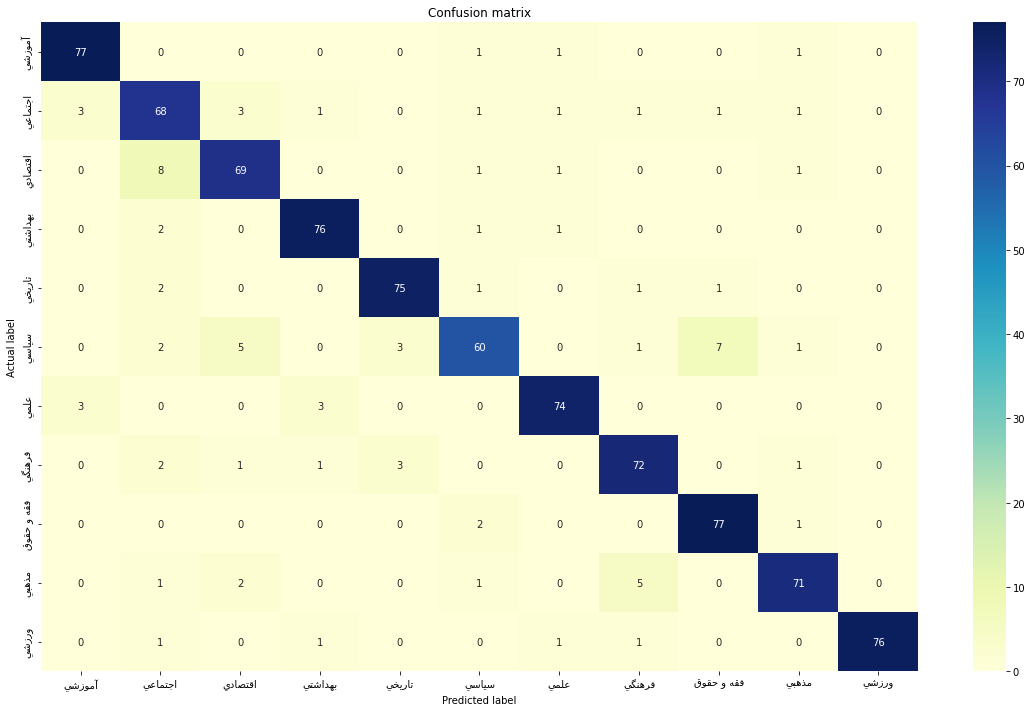

In [34]:
confusion_matrix(y_valid, y_preds)

## Test set

In [37]:
preds_output_test = trainer.predict(dataset_encoded["test"])

In [38]:
preds_output_test.metrics

{'test_accuracy': 0.8898999090081893,
 'test_f1': 0.8895984702160723,
 'test_loss': 0.46445977687835693,
 'test_runtime': 78.306,
 'test_samples_per_second': 28.069,
 'test_steps_per_second': 3.512}

In [39]:
y_test = np.array(dataset_encoded["test"]["label"])

In [40]:
y_preds_test = np.argmax(preds_output_test.predictions, axis=1)

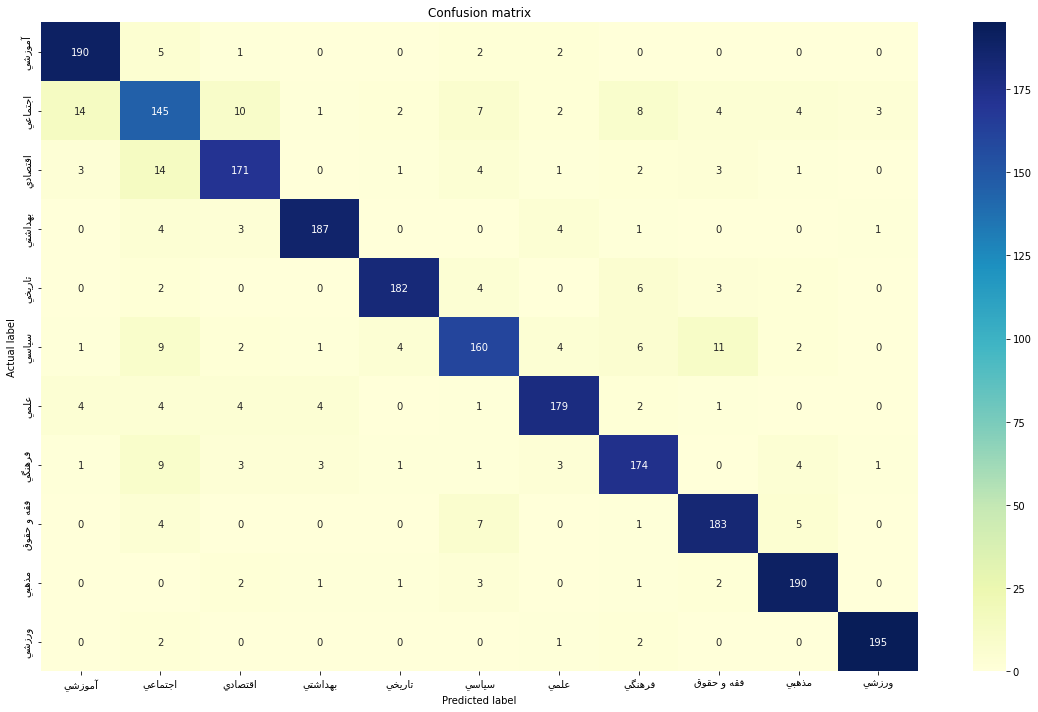

In [41]:
confusion_matrix(y_test, y_preds_test)

In [42]:
classification_report(y_test, y_preds_test)

'              precision    recall  f1-score   support\n\n           0       0.89      0.95      0.92       200\n           1       0.73      0.72      0.73       200\n           2       0.87      0.85      0.86       200\n           3       0.95      0.94      0.94       200\n           4       0.95      0.91      0.93       199\n           5       0.85      0.80      0.82       200\n           6       0.91      0.90      0.91       199\n           7       0.86      0.87      0.86       200\n           8       0.88      0.92      0.90       200\n           9       0.91      0.95      0.93       200\n          10       0.97      0.97      0.97       200\n\n    accuracy                           0.89      2198\n   macro avg       0.89      0.89      0.89      2198\nweighted avg       0.89      0.89      0.89      2198\n'

In [43]:
from torch.nn.functional import cross_entropy
def forward_pass_with_label(batch):
  # Place all input tensors on the same device as the model
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch["label"].to(device),
                        reduction="none")
  # Place outputs on CPU for compatibility with other dataset columns
  return {"loss": loss.cpu().numpy(),
  "predicted_label": pred_label.cpu().numpy()}

In [44]:
# Convert our dataset back to PyTorch tensors
dataset_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask",
"label"])
# Compute loss values
dataset_encoded["validation"] = dataset_encoded["validation"].map(
  forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/55 [00:00<?, ?ba/s]

In [57]:
def inverse(idx):
  inv = {0: "آموزشي",
         1: "اجتماعي",
         2: "اقتصادي",
         3: "بهداشتي",
         4: "تاريخي",
         5: "سياسي",
         6: "علمي",
         7: "فرهنگي",
         8: "فقه و حقوق",
         9: "مذهبي",
         10: "ورزشي"}
  return inv[idx]         

In [58]:
dataset_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_valid = dataset_encoded["validation"][:][cols]
df_valid["label"] = df_valid["label"].apply(inverse)
df_valid["predicted_label"] = (df_valid["predicted_label"]
                              .apply(inverse)) 

In [59]:
df_valid.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
736,وحيد عربي در گفت‌وگو با خبرنگار خبرگزاري دانشج...,فرهنگي,مذهبي,7.177073
488,دكتر محمد مددپور، عضو هيات علمي دانشگاه شاهد د...,سياسي,تاريخي,7.168280
257,دكتر محمد قاسم زارع قلات، در گفت‌وگو با خبرنگا...,اجتماعي,آموزشي,6.583506
380,همزمان با نودمين سال‌روز تولد دكتر «انورخامه‌ا...,فرهنگي,تاريخي,6.481399
263,دكتر احمد ميدري نماينده مردم آبادان، در گفت و ...,اقتصادي,سياسي,6.431888
612,با ابلاغ رييس جمهور مصوبه شوراي عالي انقلاب فر...,تاريخي,اجتماعي,6.275783
307,وي تصريح كرد: امروز شاهد گسترش فعاليت صندوق وق...,اقتصادي,مذهبي,6.229373
768,به گزارش خبرنگار خبرگزاري دانشجويان ايران(ايسن...,سياسي,اقتصادي,6.199952
561,دانشجويان پزشكي به دليل نبود واحدهاي درسي با ن...,علمي,بهداشتي,6.152051
810,وي در گفت‌وگو با خبرنگار حقوقي خبرگزاري دانشجو...,سياسي,فقه و حقوق,6.141852


## Test the pipeline with a sample news

In [62]:
from transformers import pipeline

# Change `transformersbook` to your Hub username
model_id = "/content/drive/MyDrive/NLP/HW5/HooshvareLab/bert-base-parsbert-uncased-finetuned-persika/checkpoint-1500"
classifier = pipeline("text-classification", model=model_id)

In [74]:
custom_news = "کیمیا علیزاده تکواندوکار آلمانی-ایرانی است. وی نخستین و تنها زن ایرانی است که در تاریخ ورزش ایران در بازی‌های المپیک، برنده مدال شده‌است. با هجده سال سن، جوان‌ترین مدال‌آور تاریخ ایران در دوره‌های المپیک است "
preds = classifier(custom_news, return_all_scores=True)

In [75]:
preds

[[{'label': 'LABEL_0', 'score': 0.0005104840383864939},
  {'label': 'LABEL_1', 'score': 0.0022324910387396812},
  {'label': 'LABEL_2', 'score': 0.002787326229736209},
  {'label': 'LABEL_3', 'score': 0.0014272055123001337},
  {'label': 'LABEL_4', 'score': 0.0009883608436211944},
  {'label': 'LABEL_5', 'score': 0.0018907113699242473},
  {'label': 'LABEL_6', 'score': 0.0010337982093915343},
  {'label': 'LABEL_7', 'score': 0.00434347428381443},
  {'label': 'LABEL_8', 'score': 0.0009115884313359857},
  {'label': 'LABEL_9', 'score': 0.0018415654776617885},
  {'label': 'LABEL_10', 'score': 0.9820329546928406}]]

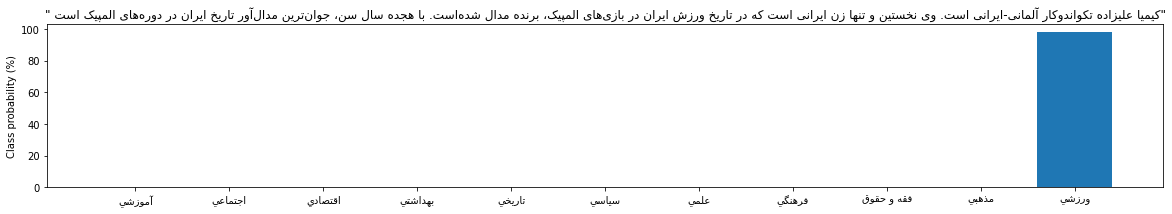

In [77]:
preds_df = pd.DataFrame(preds[0])
plt.bar(classes_fa_style, 100 * preds_df["score"], color='C0')
plt.title(f'"{get_display(reshape(custom_news))}"')
plt.ylabel("Class probability (%)")
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

این خبر جزو خبرهای اجتماعی سایت خبرگزاری تنسیم می باشد اما مدل آن را به عنوان خبر آموزشی تشخیص داده است.

In [78]:
custom_news = "آزمون سراسری ۱۴۰۱ با اعلام نتایج اولیه به مراحل پایانی نزدیک می‌شود و امسال هم تقریبا دانش‌آموزان مدارس دولتی از چرخه رقابت برای حضور در میان نفرات برتر کنکور و آزمون‌های علمی حذف شده‌اند و صرفا مدارس غیردولتی یا خاص در این رقابت جای دارند! "
preds = classifier(custom_news, return_all_scores=True)

In [81]:
preds

[[{'label': 'LABEL_0', 'score': 0.7138827443122864},
  {'label': 'LABEL_1', 'score': 0.024953272193670273},
  {'label': 'LABEL_2', 'score': 0.004537615459412336},
  {'label': 'LABEL_3', 'score': 0.005258497782051563},
  {'label': 'LABEL_4', 'score': 0.0034154579043388367},
  {'label': 'LABEL_5', 'score': 0.010595129802823067},
  {'label': 'LABEL_6', 'score': 0.1976059079170227},
  {'label': 'LABEL_7', 'score': 0.009402856230735779},
  {'label': 'LABEL_8', 'score': 0.00416629109531641},
  {'label': 'LABEL_9', 'score': 0.0035020692739635706},
  {'label': 'LABEL_10', 'score': 0.022680049762129784}]]

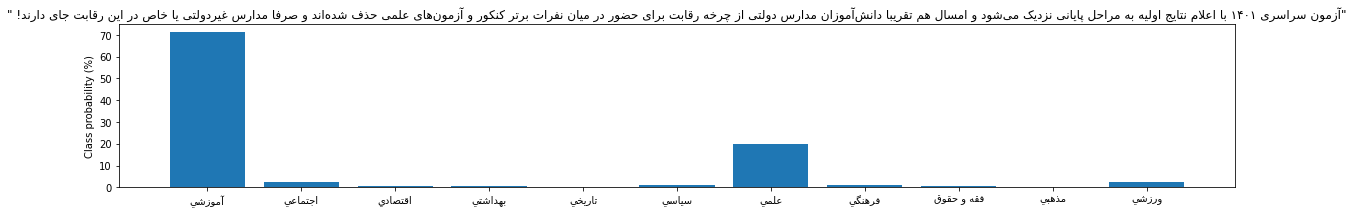

In [82]:
preds_df = pd.DataFrame(preds[0])
plt.bar(classes_fa_style, 100 * preds_df["score"], color='C0')
plt.title(f'"{get_display(reshape(custom_news))}"')
plt.ylabel("Class probability (%)")
plt.rcParams["figure.figsize"] = (20,3)
plt.show()